In [79]:
pip install imutils

In [80]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from skimage import measure
import imutils

# Reading Data

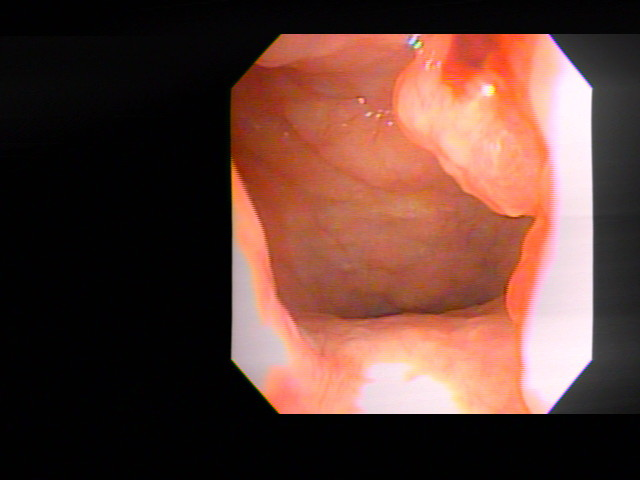

In [2]:
img_path = "/content/drive/MyDrive/Colab Notebooks/聖馬爾定/Dataset/原始圖片/0045289_0510172120/0045289_0510172120_I00041884860.jpg"

img = cv2.imread(img_path)
cv2_imshow(img)

# Crop Black Border

In [14]:
def crop_border(img, adjust_top_x=0, adjust_top_y=0, adjust_bot_x=0, adjust_bot_y=0):
  img = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
  h, w = img.shape[:2]

  imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  ret, thresh = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY)  # Convert Img to Binary
  
  contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)  # Find Contour
  rects = [cv2.boundingRect(cnt) for cnt in contours] # Get all Contours

  top_x = min([x for (x, y, w, h) in rects])
  top_y = min([y for (x, y, w, h) in rects])
  bottom_x = max([x+w for (x, y, w, h) in rects])
  bottom_y = max([y+h for (x, y, w, h) in rects])

  top_x = top_x + adjust_top_x
  bottom_x = bottom_x - adjust_bot_x
  top_y = top_y + adjust_top_y
  bottom_y = bottom_y - adjust_bot_y

  roi = img[top_y:bottom_y, top_x:bottom_x]
  return roi

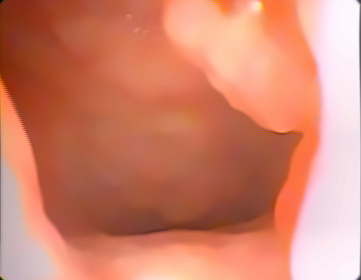

In [16]:
roi = crop_border(img)
cv2_imshow(roi)

# Resize Image

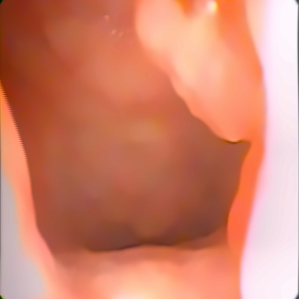

In [18]:
src = cv2.resize(roi, (299, 299))
cv2_imshow(src)

# Remove Specularity

In [53]:
def create_mask(image, thresh):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY )
    blurred = cv2.GaussianBlur(gray, (9,9), 0)
    _,thresh_img = cv2.threshold(blurred, thresh, 255, cv2.THRESH_BINARY)
    thresh_img = cv2.erode(thresh_img, None, iterations=2)
    thresh_img  = cv2.dilate(thresh_img, None, iterations=4)
    labels = measure.label(thresh_img, connectivity=2, background=0)
    mask = np.zeros( thresh_img.shape, dtype="uint8" )
    # loop over the unique components
    for label in np.unique( labels ):
        # if this is the background label, ignore it
        if label == 0:
            continue
        # otherwise, construct the label mask and count the
        # number of pixels
        labelMask = np.zeros(thresh_img.shape, dtype="uint8" )
        labelMask[labels == label] = 255
        numPixels = cv2.countNonZero(labelMask)
        # if the number of pixels in the component is sufficiently
        # large, then add it to our mask of "large blobs"
        if numPixels > 300:
            mask = cv2.add(mask, labelMask)
    return mask

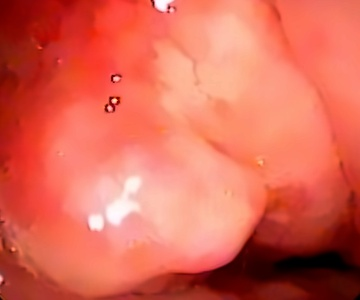

In [62]:
imgPath = '/content/drive/MyDrive/Colab Notebooks/聖馬爾定/Dataset_Check/Original/1/9570278_0709120374_I00055857764.jpg'
img = cv2.imread(imgPath)

cv2_imshow(img)

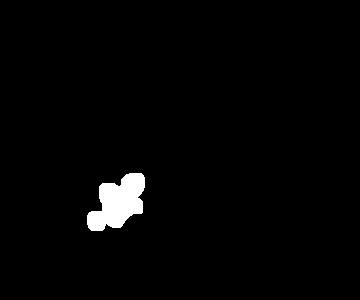

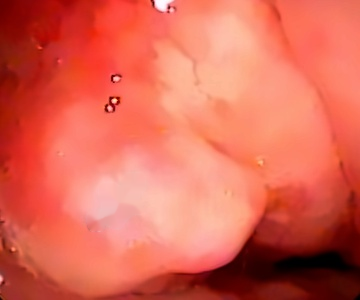

In [72]:
# Get Mask from Img
#specularity removal
mask = create_mask(img, 210)
cv2_imshow(mask)

telea = cv2.inpaint(img, mask, 12, 0)
cv2_imshow(telea)

# Transfer into Different Color Space

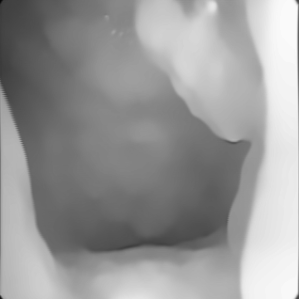

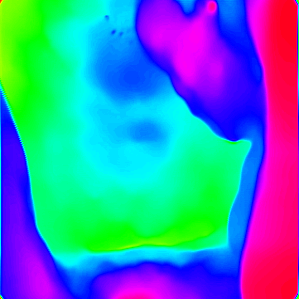

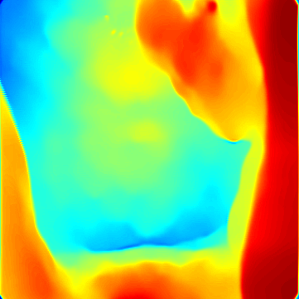

In [78]:
roi = cv2.resize(roi, (299, 299))
gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)
hsv = cv2.applyColorMap(gray, cv2.COLORMAP_HSV)
cv2_imshow(hsv)
jet = cv2.applyColorMap(gray, cv2.COLORMAP_JET)
cv2_imshow(jet)

# Edge Detetion

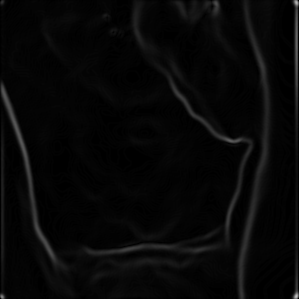

In [83]:
blur = cv2.GaussianBlur(gray, (7, 7), 0)

img_sobel_x = cv2.Sobel(blur, cv2.CV_16S, dx=1, dy=0, ksize=3)
img_sobel_x = cv2.convertScaleAbs(img_sobel_x)

img_sobel_y = cv2.Sobel(blur, cv2.CV_16S, dx=0, dy=1, ksize=3)
img_sobel_y = cv2.convertScaleAbs(img_sobel_y)

img_sobel_combine = cv2.addWeighted(img_sobel_x, 0.5, img_sobel_y, 0.5, 0)

cv2_imshow(img_sobel_combine)